# Evaluación Final Módulo 3

In [2]:
# Importo librerías

# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuración ara poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

## Fase 1: Exploración y Limpieza

### 1. Exploración Inicial:

- Realiza una exploración inicial de los datos para identificarposibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

In [2]:
def dataframe_exploration(df):

    print("*" * 50,"\n")
    print(f"--- DATAFRAME EXPLORATION: ---\n")
    print("*" * 50,"\n")
    
    # Estructura del dataframe y tipos de datos
    print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
    
    print(f"Muestra de filas aleatorias:")
    display(df.sample(5))
    
    print(f"\nTipos de datos por columna:")
    display(pd.DataFrame(df.dtypes, columns = ["tipo_dato"]))
    
    print(f"\nInformacion del DataFrame:")
    display(df.info())
    print("_" * 50,"\n")

    # Valores duplicados
    duplicated_values = df.duplicated().sum()
    duplicated_percentage = round(duplicated_values / df.shape[0] * 100, 2)
    print(f"Numero de duplicados en el conjunto de datos son: {duplicated_values}, un {duplicated_percentage}%.\n")
    print("_" * 50,"\n")

    # Valores nulos
    print("Valores nulos por columna:")
    null_values = df.isnull().sum()
    null_percentage = null_values / df.shape[0] * 100
    df_nulos = pd.DataFrame(null_percentage, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    print("_" * 50,"\n")
    
    # Estadisticas basicas para columnas numericas
    col_num = df.select_dtypes(include=["number"])
    if not col_num.empty:
        print("Estadisticas basicas de columnas numericas:")
        df_num_est = pd.DataFrame(col_num.describe().T)
        display(df_num_est)
        
        # Visualizacion de valores atipicos
        print("\nEstadisticas basicas de columnas numericas:")   
        fig, axes = plt.subplots(nrows=1, ncols=len(col_num.columns), figsize=(16, 5))
        for ax, col in zip(axes.flat, col_num.columns):
            sns.boxplot(x=col, data=df, ax=ax)
        plt.tight_layout()
        plt.show()
            
    else:
        print("\nNo hay columnas numericas en el DataFrame.")

    # Mostrar estadisticas basicas para columnas categoricas
    col_cat = df.select_dtypes(include=["object", "category"])
    if not col_cat.empty:
        print("\nEstadisticas basicas de columnas categoricas:")
        df_cat_est = pd.DataFrame(col_cat.describe().T)
        display(df_cat_est)
    else:
        print("\nNo hay columnas categoricas en el DataFrame.\n")
        
    print("\n\n")

************************************************** 

--- DATAFRAME EXPLORATION: ---

************************************************** 

El DataFrame tiene 16737 filas y 16 columnas.

Muestra de filas aleatorias:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
9079,860206,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,55880.0,Married,Nova,13268.79,Standard,2017,10,NaN,NaN
13621,673872,Canada,British Columbia,Vancouver,V6E 3D9,Female,College,NaN,Single,Star,5375.66,Standard,2018,6,NaN,NaN
2748,688168,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,49477.0,Married,Aurora,8754.16,Standard,2013,6,NaN,NaN
8801,970576,Canada,Manitoba,Winnipeg,R6Y 4T5,Male,High School or Below,73751.0,Married,Nova,10839.51,Standard,2017,9,NaN,NaN
3524,829316,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,50401.0,Single,Aurora,14065.30,Standard,2012,6,NaN,NaN



Tipos de datos por columna:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



Informacion del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 

None

__________________________________________________ 

Numero de duplicados en el conjunto de datos son: 0, un 0.0%.

__________________________________________________ 

Valores nulos por columna:


,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


__________________________________________________ 

Estadisticas basicas de columnas numericas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00



Estadisticas basicas de columnas numericas:


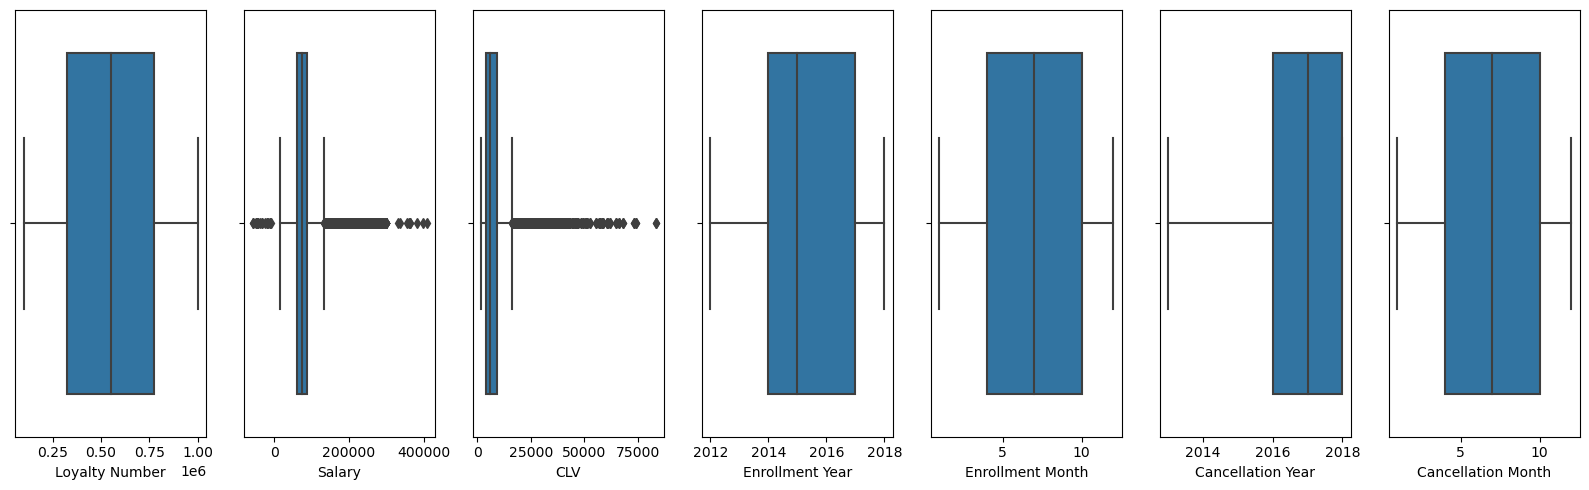


Estadisticas basicas de columnas categoricas:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766





************************************************** 

--- DATAFRAME EXPLORATION: ---

************************************************** 

El DataFrame tiene 405624 filas y 10 columnas.

Muestra de filas aleatorias:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
149518,441345,2018,9,8,5,13,1040,104.0,0,0
199424,818881,2017,12,0,0,0,0,0.0,0,0
324433,277370,2018,8,0,0,0,0,0.0,0,0
136728,280292,2017,2,6,4,10,2880,288.0,487,39
148855,825730,2017,9,0,0,0,0,0.0,0,0



Tipos de datos por columna:


,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



Informacion del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


None

__________________________________________________ 

Numero de duplicados en el conjunto de datos son: 1864, un 0.46%.

__________________________________________________ 

Valores nulos por columna:


,%_nulos


__________________________________________________ 

Estadisticas basicas de columnas numericas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0



Estadisticas basicas de columnas numericas:


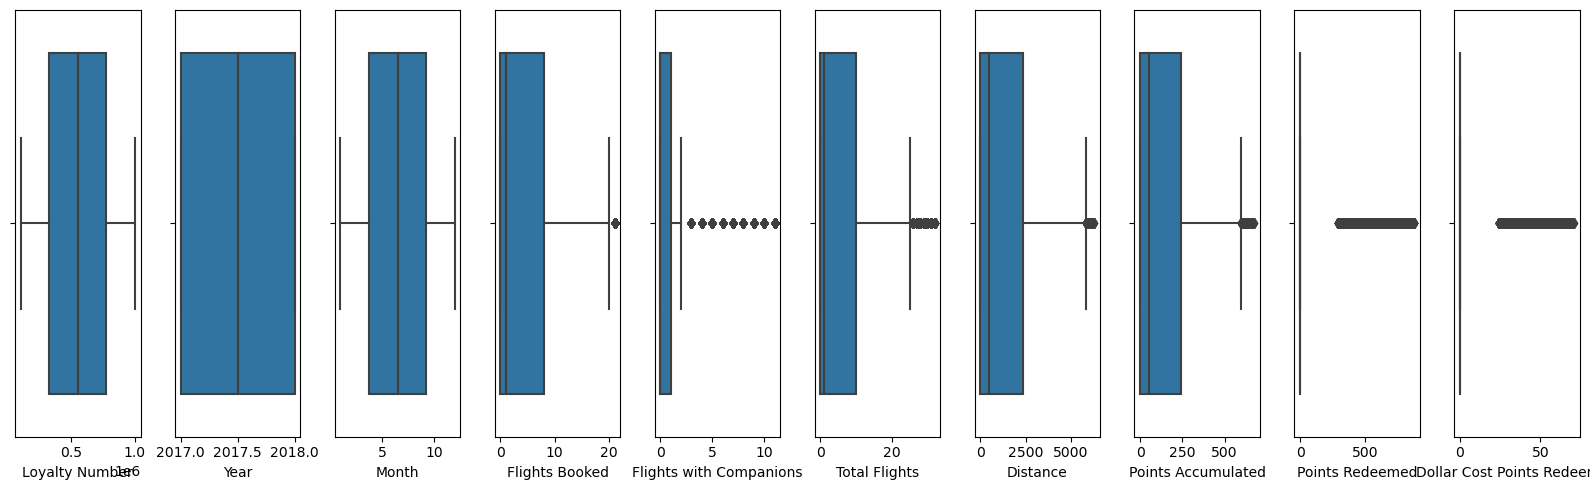


No hay columnas categoricas en el DataFrame.






In [3]:
# Guardo cada csv en un Dataframe
def csv_to_dataframe(file):
    return pd.read_csv(file)

df_loyalty = csv_to_dataframe("Customer Loyalty History.csv")
df_flight = csv_to_dataframe("Customer Flight Activity.csv")

dataframe_list = [df_loyalty, df_flight]

# Recorro la lista para aplicar la funcion de exploracion a cada dataframe
for dataframe in dataframe_list:
    dataframe_exploration(dataframe)

- Une los dos conjuntos de datos de la forma más eficiente.

Para unir los DataFrames, compruebo si tienen alguna columna en común, y en caso de que sí, si los valores únicos de ambas columnas coinciden.

In [4]:
# Creo una funcion para buscar las columnas en comun y si sus valores unicos coinciden
def verify_common_columns(df1, df2):
    # Verifico columnas comunes usando la interseccion
    common_columns = df1.columns.intersection(df2.columns)
    if common_columns.empty:
        print("No hay columnas con el mismo nombre en ambos DataFrames.")
        return
    else:
        print(f"Ambos DataFrames tienen las siguientes columnas en comun: {common_columns.tolist()}")
    
    # Verifico valores en comun y simetria
    for col in common_columns:
        # Lo convierto a set para quedarme con los valores unicos
        values_df1 = set(df1[col])
        values_df2 = set(df2[col])
        
        if values_df1 == values_df2:
            print(f"Los valores de la columna '{col}' son idénticos en ambos DataFrames.")
        elif values_df1.issubset(values_df2) and values_df2.issubset(values_df1):
            print(f"Los valores de la columna '{col}' son simétricos entre ambos DataFrames.")
        else:
            print(f"Los valores de la columna '{col}' no son simétricos entre ambos DataFrames.")
            
        print(f"La columna {col} del primer DataFrame tiene {df1[col].duplicated().sum()} valores duplicados.")
        print(f"La columna {col} del segundo DataFrame tiene {df2[col].duplicated().sum()} valores duplicados.")
            
verify_common_columns(df_loyalty,df_flight)

Ambos DataFrames tienen las siguientes columnas en comun: ['Loyalty Number']
Los valores de la columna 'Loyalty Number' son idénticos en ambos DataFrames.
La columna Loyalty Number del primer DataFrame tiene 0 valores duplicados.
La columna Loyalty Number del segundo DataFrame tiene 388887 valores duplicados.


Uno los dos DataFrames usando en método `.merge()` basándome en la columna `Loyalty Number` y teniendo en cuenta que en el DataFrame `df_flight` hay valores duplicados en dicha columna.

In [5]:
def merge_dataframes(df_left, df_right, col_left, col_right, how):
    return df_left.merge(df_right, how=how, left_on=col_left, right_on=col_right)

In [6]:
df_merged = merge_dataframes(df_loyalty, df_flight, 'Loyalty Number','Loyalty Number', 'right')
df_merged.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030,203.0,0,0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200,120.0,0,0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0,0.0,0,0


### 2. Limpieza de Datos:

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

Creo una función para eliminar valores duplicados, columnas con más de un 30% de nulos, columnas con un solo valor único que no aportan información relevante, convertir valores numericos negativos en absolutos, redondear decimales y cambiar los nombres de las columnas para evitar posibles errores.

In [36]:
def clean_data(df):
    # Elimino duplicados si los hay
    if df.duplicated().any():
        print(f"Hay {df.duplicated().sum()} registros duplicados encontrados y eliminados.")
        df = df.drop_duplicates(keep='first')
    else:
        print("No se encontraron duplicados.")
    
    # Elimino columnas con más del 30% de nulos
    null_percentage = df.isnull().mean()
    cols_to_remove = null_percentage[null_percentage > 0.3].index

    if not cols_to_remove.empty:
        df = df.drop(columns=cols_to_remove)
        print(f"Columnas eliminadas con más del 30% de valores nulos: {list(cols_to_remove)}")
    else:
        print("No se eliminaron columnas por valores nulos.")
        
    # Elimino columnas con un solo valor unico
    cols_one_value = [col for col in df.columns if df[col].nunique() == 1]
    if cols_one_value:
        df = df.drop(columns=cols_one_value)
        print(f"Columnas eliminadas con solo un valor unico: {cols_one_value}")
    else:
        print("No se encontraron columnas con solo un valor unico.")
        
    # Convierto a absolutos los valores numericos negativos
    col_num = df.select_dtypes(include=['number'])
    cols_negative = [col for col in col_num.columns if (col_num[col] < 0).any()]
    if cols_negative:
        print(f"Columnas con valores negativos convertidos a absolutos: {cols_negative}")
        df[cols_negative] = df[cols_negative].abs()
    else:
        print("No se encontraron columnas con valores negativos.")
    
    # Redondeo columnas tipo float a dos decimales si no se pueden convertir a enteros
    cols_float = df.select_dtypes(include=[float]).columns
    if cols_float.any():
        print(f"Columnas tipo float redondeadas a dos decimales o convertidas a enteros: {list(cols_float)}")
        for col in cols_float:
            df[col] = df[col].apply(lambda x: round(x, 2) if x % 1 != 0 else int(x))
    else:
        print("No se encontraron columnas tipo float.")
        
    # Transformo nombres de columnas a minusculas y reemplazo espacios por guiones bajos
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    print(f"Nombres de columnas cambiados a minuscula y con guiones bajos en vez de espacios.")
       
    return df

In [38]:
df_cleaned = clean_data(df_merged)
# Verificar los cambios
print("\nMuestra aleatoria de DataFrame actualizado:")
df_cleaned.sample(3)

Hay 1864 registros duplicados encontrados y eliminados.
Columnas eliminadas con más del 30% de valores nulos: ['Cancellation Year', 'Cancellation Month']
Columnas eliminadas con solo un valor unico: ['Country']
Columnas con valores negativos convertidos a absolutos: ['Salary']
Columnas tipo float redondeadas a dos decimales o convertidas a enteros: ['Salary', 'CLV', 'Points Accumulated']
Nombres de columnas cambiados a minuscula y con guiones bajos en vez de espacios.

Muestra aleatoria de DataFrame actualizado:


,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
276725,436990,British Columbia,Whistler,V6T 1Y8,Female,College,NaN,Single,Nova,4411.66,Standard,2018,11,2018,5,11,0,11,4136,413.0,0,0
350971,787525,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,68790.0,Divorced,Aurora,5372.91,Standard,2015,6,2018,9,8,4,12,804,80.0,0,0
88159,296457,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,53464.0,Married,Nova,5754.85,Standard,2014,11,2017,6,0,0,0,0,0.0,0,0


In [39]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_col_num = df_cleaned[df_cleaned.columns[df_cleaned.isnull().any()]].select_dtypes(include = np.number).columns
print(f"Las columnas numéricas que tienen nulos son:\n{nulos_col_num}\n")
print(f"El numero de nulos que tiene cada columna numerica es:\n{df_cleaned[nulos_col_num].isnull().sum() / df_cleaned.shape[0]}")

Las columnas numéricas que tienen nulos son:
Index(['salary'], dtype='object')

El numero de nulos que tiene cada columna numerica es:
salary    0.253269
dtype: float64


Compruebo si dentro de la columna numérica con valores nulos `salary` tiene valores atípicos.

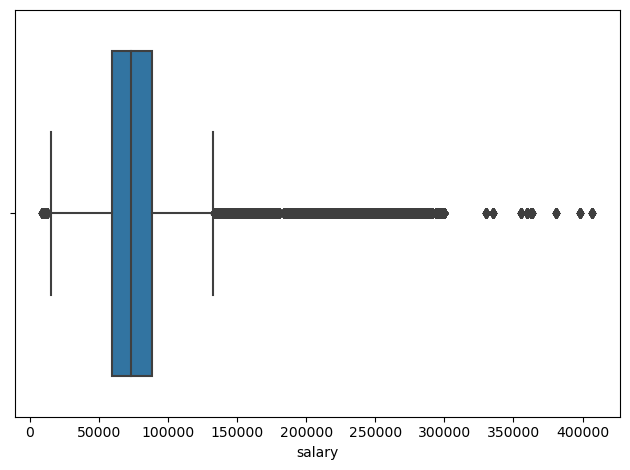

In [43]:
sns.boxplot(x = "salary", data = df_cleaned)
plt.tight_layout()

Confirmo que tiene valores atípicos, por lo que optaremos por reemplazar los nulos con métodos avanzados como KNNImputer y IterativeImputer. Aplicaremos los dos métodos para compararlos.

In [45]:
# Instancio el imputador iterativo
imputer_iterative = IterativeImputer(max_iter=20, random_state=42)

# Ajusto y transformo los datos (imputacion)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_cleaned[["salary"]])

# Creo una nueva columna
df_cleaned["salary_iterative"] = imputer_iterative_imputado

# Verificar valores nulos despues de la imputacion
print(f"Despues del 'Iterative' tenemos: \n{df_cleaned['salary_iterative'].isnull().sum()} nulos")

Despues del 'Iterative' tenemos: 
0 nulos


In [46]:
# Instancio la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# Ajusto y transformo los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_cleaned[["salary"]])

# Añado array al DataFrame como una columna nueva
df_cleaned["salary_knn"] = imputer_knn_imputado

# Compruebo los nulos
print(f"Despues del 'KNN' tenemos: \n{df_cleaned['salary_knn'].isnull().sum()} nulos")

Despues del 'KNN' tenemos: 
0 nulos


Comparo con cual de los dos métodos se ajusta mejor a los datos, para ello hago un `.describe()`para ver si los estadísticos antes y después de la imputación no han cambiado mucho. Nos quedaremos con el método que modifique menos los estadísticos.

In [47]:
df_cleaned.describe()[["salary","salary_iterative", "salary_knn"]]

,salary,salary_iterative,salary_knn
count,301500.000000,403760.000000,403760.000000
mean,79371.732902,79371.732902,79371.732902
std,34726.433958,30008.343196,30008.343196
min,9081.000000,9081.000000,9081.000000
25%,59262.000000,63901.000000,63901.000000
50%,73479.000000,79371.732902,79371.732902
75%,88606.000000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000


Elimino la columna `salary` que tiene nulos y podría eliminar cualquiera de las columnas derivadas de la imputación porque no hay un método que impute peor los nulos, los valores resultantes son iguales.

In [48]:
# Elimino la columna Salary y la imputada con KNNImputer
df_cleaned.drop(["salary","salary_knn"], axis = 1, inplace = True)

# Cambio el nombre de la columna Salary Iterative a Salary
df_cleaned.rename(columns={"salary_iterative": "salary"}, inplace=True)

In [49]:
# Guardo el DataFrame limpio en un .csv
df_cleaned.to_csv("customer-data.csv",index=False)

## Fase 2: Visualización

In [30]:
# Cargo el DataFrame limpio para no tener que ejecutar las celdas anteriores
df_cleaned = pd.read_csv("customer-data.csv")
df_cleaned.sample()

,loyalty_number,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary
107499,457489,Nova Scotia,Halifax,B3C 2M8,Female,Bachelor,Married,Star,3155.46,Standard,2014,1,2017,7,0,0,0,0,0.0,0,0,58766.0


Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

**1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?**

Para visualizar la cantidad de vuelos reservados por mes, una opción adecuada sería usar el gráfico de barras o barplot, que utiliza barras rectangulares para representar datos categóricos. En este caso, esta gráfica me ayudará a comparar cantidades de vuelos reservados (`flights_booked`) entre diferentes categorías `month` (meses).

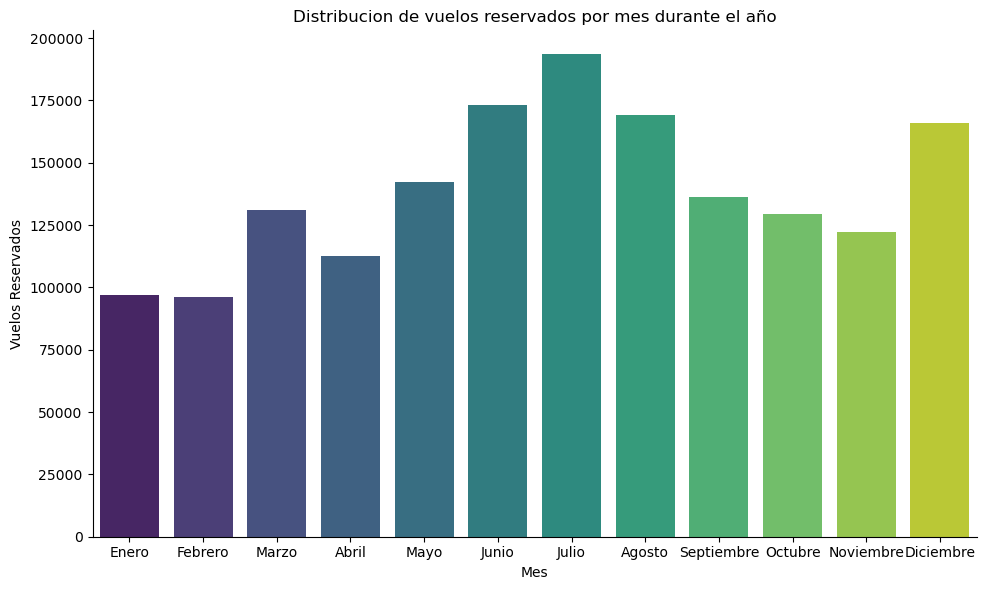

In [40]:
# Agrupo por mes y sumo la cantidad de vuelos reservados
df_flights_per_month = df_cleaned.groupby("month")["flights_booked"].sum().reset_index()

# Uso barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="month",
            y="flights_booked",
            data=df_flights_per_month,
            palette="viridis")

# Cambio el nombre de los ejes y pongo titulo a la grafica
plt.title("Distribucion de vuelos reservados por mes durante el año")
plt.xlabel("Mes")
plt.ylabel("Vuelos Reservados")
plt.xticks(ticks=range(0, 12), labels=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])

# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Muestro la grafica
plt.tight_layout()
plt.show()

- **Más reservas:** El mes con mayor número de vuelos reservados es `julio`, seguido de junio, agosto y diciembre. Podríamos decir que la estación del año con mayor número de reservas es verano.
- **Menos reservas:** Y los meses con menor número de vueloso reservados son `enero` y `febrero`.

**2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?**

Usaré un gráfico de regresión o regplot para explorar la relación entre las variables numéricas `distance` y `points_accumulated` y, a su vez, ver cómo se ajuta la línea de regresión lineal a esos datos.

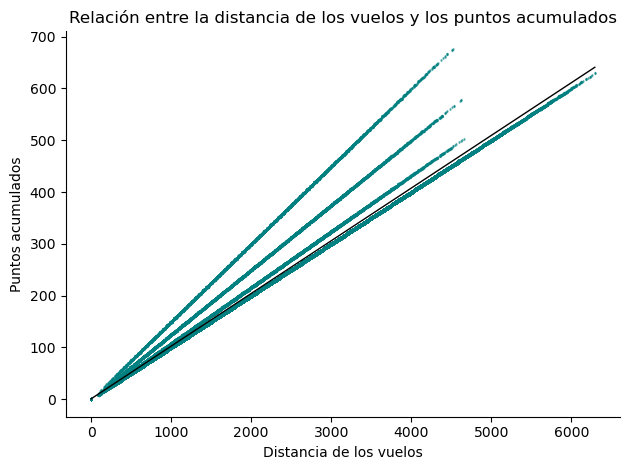

In [14]:
# Selecciono las columnas relevantes para la visualizacion
df_distance_points = df_cleaned[["distance","points_accumulated"]]

# Creo el grafico de dispersion con regresion lineal
sns.regplot(x="distance",
            y="points_accumulated",
            data=df_distance_points,
            marker ="d",
            line_kws = {"color": "black", "linewidth": 1},
            scatter_kws={"color": "teal", "s": 1, "alpha":0.5})

# Cambio el nombre de los ejes y pongo titulo a la grafica
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados")
plt.xlabel("Distancia de los vuelos")
plt.ylabel("Puntos acumulados")
# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Muestro la grafica
plt.tight_layout()
plt.show()

- La nube de puntos que tiende hacia arriba y la línea de tendencia indican que sí que existe una relación entre ambas variables, **a mayor distancia de los vuelos más puntos acumulados**.

**3. ¿Cuál es la distribución de los clientes por provincia o estado?**

Empleo la visualización de countplot para contar el número de veces que aparece cada una de las categorías en  el DataFrame y así ver cómo se distribuyen los/as clientes por provincia o estado.

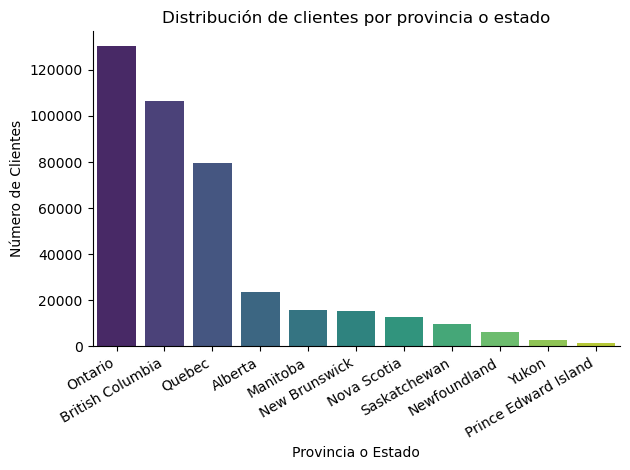

In [28]:
# Elimino duplicados basados en loyalty_number para contar clientes unicos
df_unique_customers = df_cleaned.drop_duplicates(subset="loyalty_number")

# Cuento las ocurrencias de cada provincia y las ordeno de forma descendente
df_province_count = df_unique_customers["province"].value_counts().sort_values(ascending=False)

# Creo el grafico countplot
sns.countplot(x="province",
              data=df_cleaned,
              order=df_province_count.index,
              palette="viridis")

# Cambio el nombre de los ejes, los giro y pongo titulo a la grafica
plt.title("Distribución de clientes por provincia o estado")
plt.xlabel("Provincia o Estado")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=30, ha="right")
# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Muestro la grafica
plt.tight_layout()
plt.show()

- Según este gráfico podemos concluir que la mayor parte de los clientes son de `Ontario`, `British Columbia` y `Quebec`.

**4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?**

Para comparar el salario promedio entre los diferentes niveles educativos emplearé la gráfica de cajas o boxplot. También se podría usar una gráfica barplot que nos muestre la media del salario en función del nivel educativo, pero la de cajas me proporcionará información sobre la mediana, los cuartiles y los valores atípicos.

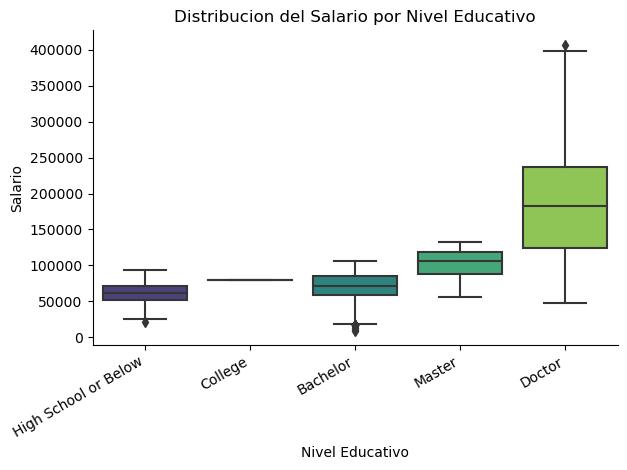

In [39]:
# Elimino duplicados basados en loyalty_number para contar clientes unicos
df_unique_customers = df_cleaned.drop_duplicates(subset="loyalty_number")

# Creo el grafico de cajas
sns.boxplot(x="education",
            y="salary",
            data=df_unique_customers,
            palette="viridis",
            order = ["High School or Below", "College", "Bachelor", "Master", "Doctor"])

# Cambio el nombre de los ejes, los giro y pongo titulo a la grafica
plt.title("Distribucion del Salario por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario")
plt.xticks(rotation=30, ha="right")
# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

# Muestro la grafica
plt.tight_layout()
plt.show()

- No parece que exista una diferencia significativa entre los salarios promedios de los/as clientes que tienen niveles educativos entre `High School or Below` y `Bachelor`.
- Los que tienen `Master` sí se diferencian un poco más del grupo anterior, pero especialmete los/as clientes que son `Doctor` tienen de media un salario mucho mayor.

**5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?**

Para visualizar la proporción de clientes con diferentes tipo de tarjetas de fidelidad podemos usar la gráfica de piechart. Si hubiera muchas categorías o si estas fueran de proporciones similares, sería más conveniente usar otro tipo de visualización (como un gráfico de barras apiladas, por ejemplo), pero como solo hay tres, la gráfica de quesitos representará bien visualmente cómo se distribuyen las categorías en relación con el total.

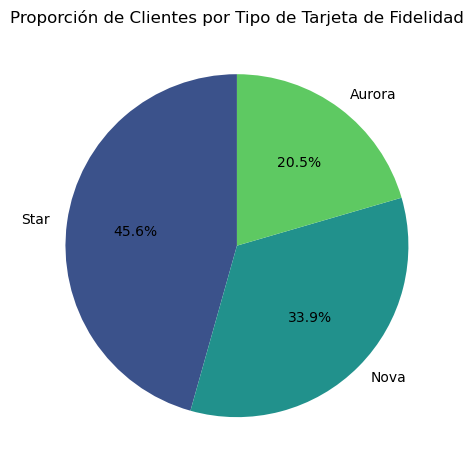

In [38]:
# Elimino duplicados basados en loyalty_number para contar clientes unicos
df_unique_customers = df_cleaned.drop_duplicates(subset="loyalty_number")

# Cuento la cantidad de clientes unicos por cada tipo de tarjeta de fidelidad
loyalty_card_counts = df_unique_customers["loyalty_card"].value_counts()

# Creo la grafica de pastel
plt.pie(loyalty_card_counts,
        labels=loyalty_card_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("viridis", len(loyalty_card_counts)))

# Pongo titulo a la grafica
plt.title("Proporción de Clientes por Tipo de Tarjeta de Fidelidad")

# Muestro la grafica
plt.tight_layout()
plt.show()

- Casi la mitad de los clientes tiene un tipo de tarjeta de fidelidad `Star`, podríamos decir que es el tipo de tarjeta predominante.
- El tipo de tarjeta de fidelidad `Nova`es más común que `Aurora`.

**6. ¿Cómo se distribuyen los clientes según su estado civil y género?**

Para poder comparar la distribución entre diferentes grupos de clientes según estado civil y género puedo usar una gráfica de barras agrupadas o una gráfica de barras apiladas. Para compararlas, las combino en una misma figura. En las barras apiladas puede ser difícil comparar las cantidades absolutas de cada género, pero me ayuda a comprender la composición interna de cada grupo de estado civil. Y las barras agrupadas facilita la comparación directa entre los género dentro de cada estado civil.

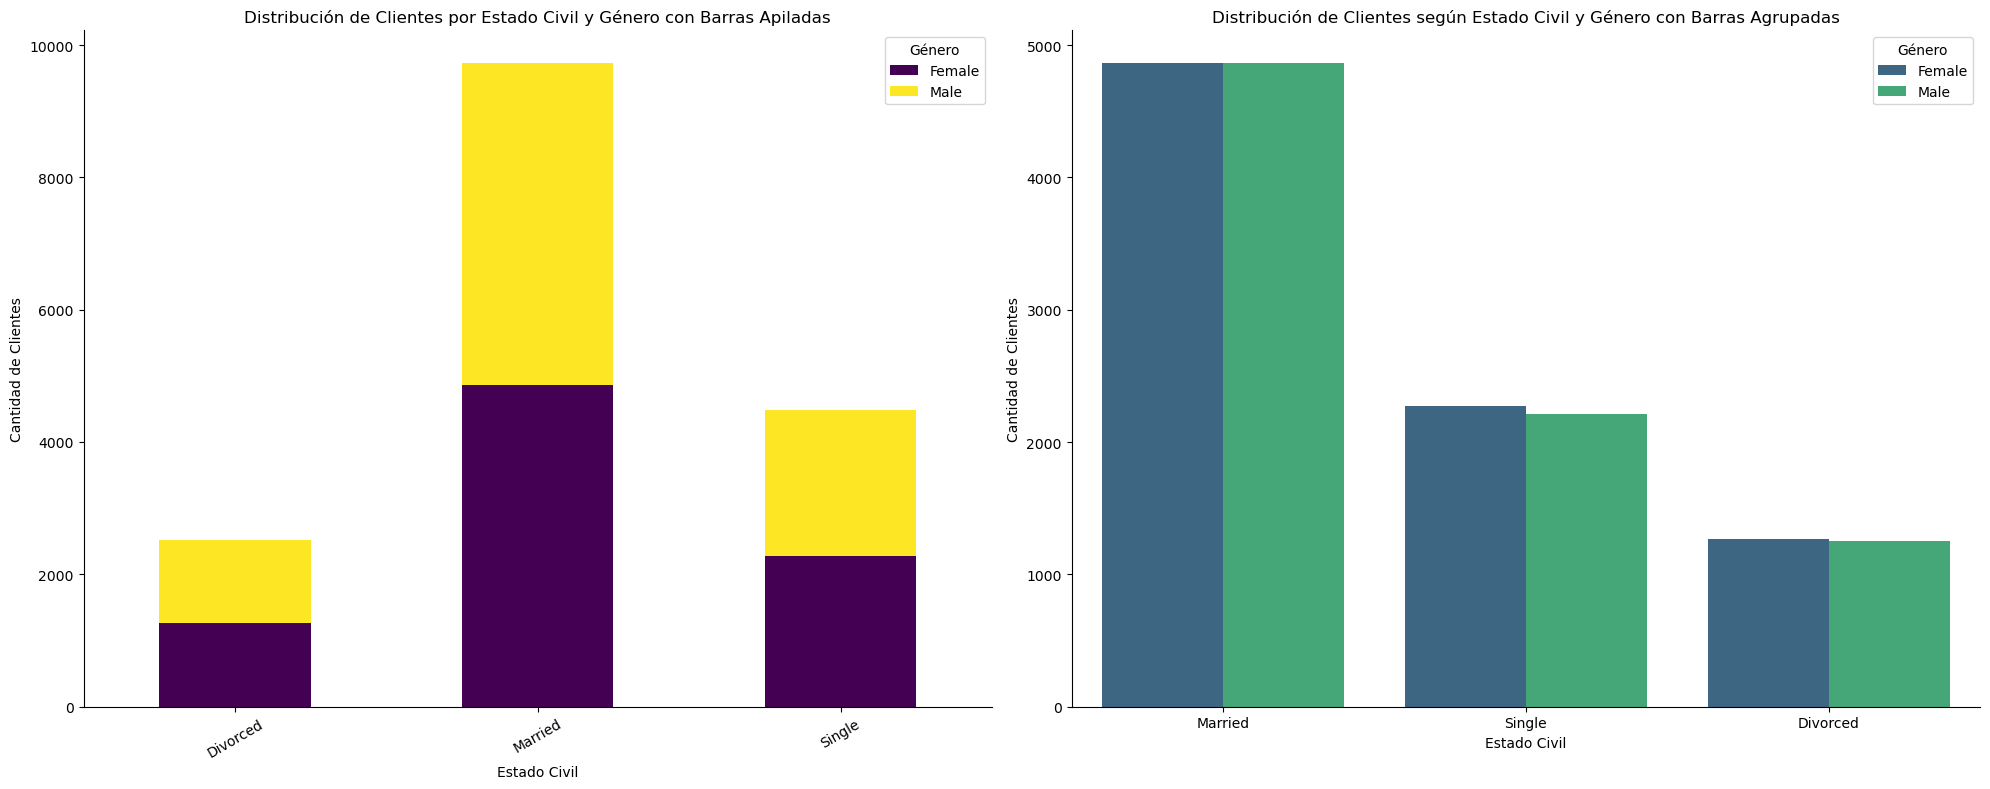

In [37]:
# Elimino duplicados basados en loyalty_number para contar clientes unicos
df_unique_customers = df_cleaned.drop_duplicates(subset="loyalty_number")

# Creo una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Creo la grafica de barras apiladas
customer_distribution = df_unique_customers.groupby(["marital_status", "gender"]).size().unstack()
customer_distribution.plot(kind="bar",
                           stacked=True,
                           colormap="viridis",
                           ax=axes[0])

# Cambio el nombre de los ejes, los giro y pongo titulo a la grafica
axes[0].set_title("Distribución de Clientes por Estado Civil y Género con Barras Apiladas")
axes[0].set_xlabel("Estado Civil")
axes[0].set_ylabel("Cantidad de Clientes")
axes[0].legend(title="Género")
axes[0].tick_params(axis="x", rotation=30)
# Quito la linea de arriba y de la derecha
axes[0].spines["right"].set_visible(False)
axes[0].spines["top"].set_visible(False)

# Creo la grafico de barras agrupadas
sns.countplot(data=df_unique_customers,
              x="marital_status",
              hue="gender",
              palette=sns.color_palette("viridis", n_colors=df_unique_customers["gender"].nunique()),
              ax=axes[1])

# Cambio el nombre de los ejes, los giro y pongo titulo a la grafica
axes[1].set_title("Distribución de Clientes según Estado Civil y Género con Barras Agrupadas")
axes[1].set_xlabel("Estado Civil")
axes[1].set_ylabel("Cantidad de Clientes")
axes[1].legend(title="Género")
# Quito la linea de arriba y de la derecha
axes[1].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False)

# Muestro la grafica
plt.tight_layout()
plt.show()

- Se puede concluir que la mayor parte de los clientes están casado/as (`married`), y una minoría están divorciado/as (`divorced`)
- La comparativa por género de cada estado civil es bastante equitativa.

## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por NivelEducativo

**Objetivo del Ejercicio:** Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

**1. Preparación de Datos:**

- Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.


**2. Análisis Descriptivo:**

- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

**3. Prueba Estadística:**

- Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.